# **Dynamic access to our Dataset from google drive**

 **To Access google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Set Path to our dataset**

In [3]:
folder_path = '/content/drive/My Drive/GurNum'

In [4]:
import os
files = os.listdir(folder_path)
print(files)

['train', 'val']


**create folder 'Num' in our workspace which have two subfolder 1. train 2. val**

In [5]:
!cp -r "/content/drive/My Drive/GurNum" "/content/Num"

# **Model Training Process**

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, callbacks
import matplotlib.pyplot as plt

# Set paths to the train and validation directories
train_dir = 'Num/train'
val_dir = 'Num/val'

# Image data generator for augmenting training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=20,  # adding slight rotation
    width_shift_range=0.2,  # adding Horizontal shift
    height_shift_range=0.2,  # adding Vertical shift
    shear_range=0.15,  # Shear transformations
    zoom_range=0.15,  # Zoom in/out
    horizontal_flip=True,  # Horizontal flipping
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images from train and validation folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),  # I find all Images are in size of 32x32
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(32, 32),  # Image size is 32x32
    batch_size=32,
    class_mode='categorical'
)

# Building my  deeeeeeper CNN model
model = models.Sequential()

# these are Convolutional layers
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# Reduced MaxPooling2D size or remove this layer to avoid feature map getting too small
model.add(layers.MaxPooling2D((1, 1)))

# Reduced filters and kernel size to prevent negative dimension error
model.add(layers.Conv2D(128, (1, 1), activation='relu'))
# Reduced MaxPooling2D size or remove this layer to avoid feature map getting too small
model.add(layers.MaxPooling2D((1, 1)))


# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization, Preventing the overfitting
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),  # Lower learning rate for stability
              metrics=['accuracy'])

# Model summary
model.summary()

# Learning rate scheduler
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce learning rate by half when validation loss plateaus
    patience=3,  # Number of epochs to wait before reducing
    min_lr=1e-7  # Minimum learning rate
)

# it is a early stopping to prevent overfitting
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)



Found 1000 images belonging to 10 classes.
Found 178 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:146: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 128)           │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,457,930 (5.56 MB)

 Trainable params: 1,457,930 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.1019 - loss: 2.2993 - val_accuracy: 0.2688 - val_loss: 2.2557 - learning_rate: 1.0000e-04
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1250 - loss: 2.2584 - val_accuracy: 0.6667 - val_loss: 2.2241 - learning_rate: 1.0000e-04
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.1718 - loss: 2.2523 - val_accuracy: 0.4313 - val_loss: 2.0210 - learning_rate: 1.0000e-04
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3750 - loss: 2.0437 - val_accuracy: 0.1111 - val_loss: 2.1169 - learning_rate: 1.0000e-04
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.2374 - loss: 2.0537 - val_accuracy: 0.4313 - val_loss: 1.6186 - learning_rate: 1.0000e-04
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.3125 - loss: 1.7823 - val_accuracy: 0.4444 - val_loss: 1.6358 - learning_rate: 1.0000e-04
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.3195 - loss: 1.8692 - val_accuracy: 0.5063 - val_loss: 1.4178 - learning_rate: 1.0000e-04
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3125 - loss: 1.9707 - val_accuracy: 0.8333 - val_loss: 1.1267 - learning_rate: 1.0000e-04
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.3507 - loss: 1

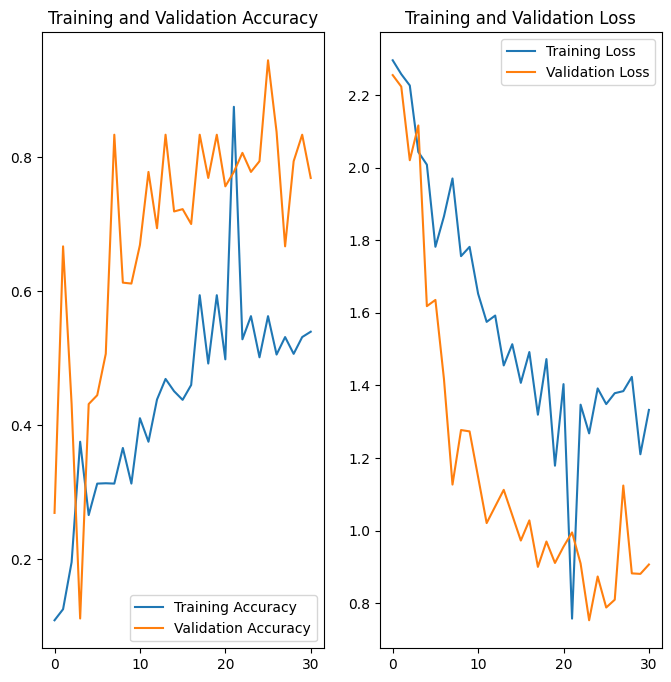

In [10]:
# # somehow i get some errors, so recompile the model
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])



history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[lr_scheduler, early_stopping]
)

# Plotting graph for training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Testing of this model**

In [ ]:
# Testing model with custom dataset
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = 'Num/13.tiff'
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

print("Predicted Class:", predicted_class)

# **Using Pretrained model VGG16**

Found 1000 images belonging to 10 classes.
Found 178 images belonging to 10 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 567ms/step - accuracy: 0.0734 - loss: 2.6210 - val_accuracy: 0.1625 - val_loss: 2.1635 - learning_rate: 1.0000e-04
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.1250 - loss: 2.5570 - val_accuracy: 0.2222 - val_loss: 2.1852 - learning_rate: 1.0000e-04
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 511ms/step - accuracy: 0.1162 - loss: 2.3888 - val_accuracy: 0.4563 - val_loss: 1.9649 - learning_rate: 1.0000e-04
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1250 - loss: 2.3749 - val_accuracy: 0.4444 - val_loss: 1.9600 - learning_rate: 1.0000e-04
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 520ms/step - accuracy: 0.1959 - loss: 2.1854 - val_accuracy: 0.6250 - val_loss: 1.8140 - learning_rate: 1.0000e-04
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3125 - loss: 2.1160

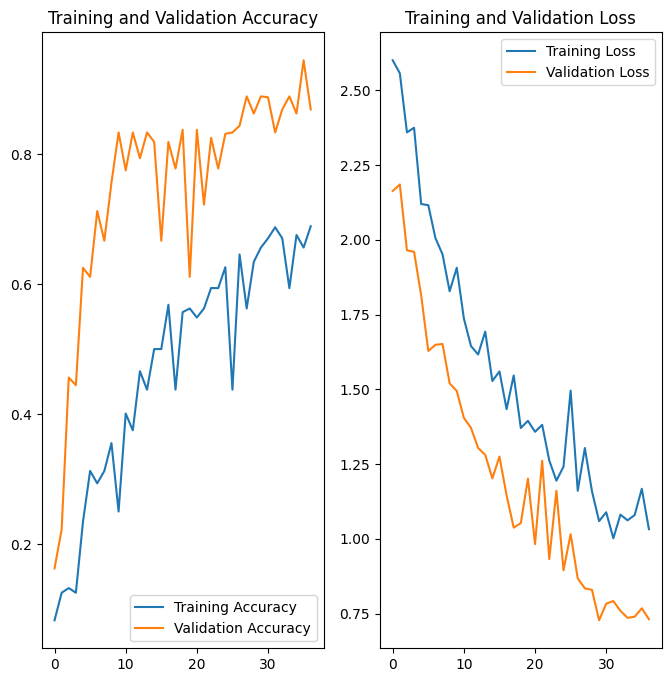

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

# Set paths to the train and validation directories

train_dir = 'Num/train'
val_dir = 'Num/val'

# same as above image data generator for augmenting training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images from train and validation folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),  # Image size is 32x32
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(32, 32),  # Image size is 32x32
    batch_size=32,
    class_mode='categorical'
)

# Now we load pre-trained VGG16 model + higher-level layers
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional base
conv_base.trainable = False

# Building the model
model = models.Sequential()

# Now we add the VGG16 convolutional base
model.add(conv_base)

# Adding new fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Compile this model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),  # Lower learning rate for stability
              metrics=['accuracy'])



# Learning rate scheduler
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7
)

# Early stopping
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

# Training this pretrained model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[lr_scheduler, early_stopping]
)

# Plotting training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [12]:
# for more better accuracy some custamization
conv_base.trainable = True

# Unfreeze only the last few convolutional layers
for layer in conv_base.layers[:-4]:
    layer.trainable = False

# Re-compile the model after unfreezing
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5),
              metrics=['accuracy'])

# Fine-tuning the model with a very low learning rate
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Fine-tuning for a few additional epochs
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.6712 - loss: 1.0294 - val_accuracy: 0.9187 - val_loss: 0.4466
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - accuracy: 0.6562 - loss: 0.9483 - val_accuracy: 0.8889 - val_loss: 0.5354
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.7253 - loss: 0.7809 - val_accuracy: 0.9187 - val_loss: 0.3759
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8125 - loss: 0.6927 - val_accuracy: 0.9444 - val_loss: 0.3626
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7612 - loss: 0.7005 - val_accuracy: 0.9250 - val_loss: 0.2911
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8438 - loss: 0.4652 - val_accuracy: 0.8889 - val_loss: 0.4640
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8047 - loss: 0.5883 - val_accuracy: 0.9375 - val_loss: 0.2765
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8125 - loss: 0.5227 - val_accuracy: 1.0000 - val_lo

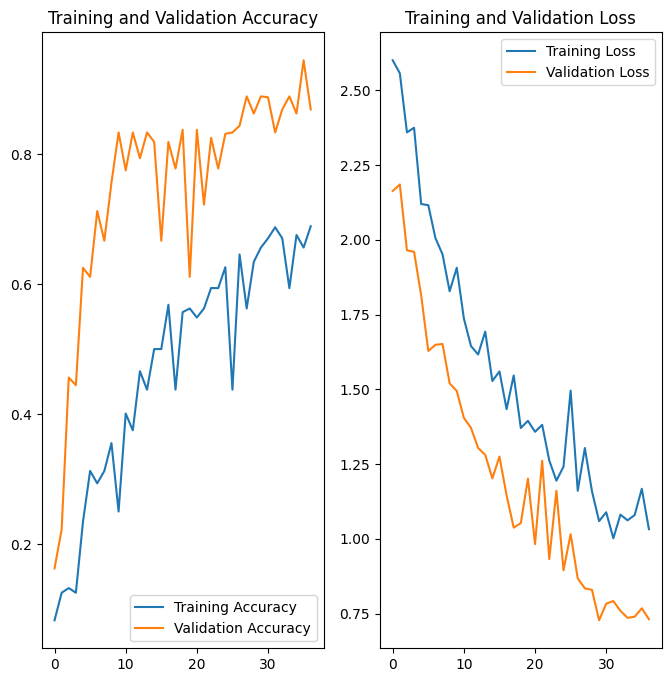

In [13]:
# Plotting training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Grad-CAM Implementation**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, LayerNormalization,Input,Lambda
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report
import cv2

# Patch size and transformer config
PATCH_SIZE = 4
NUM_HEADS = 8
NUM_LAYERS = 4
PROJECTION_DIM = 64
MLP_UNITS = [128, 64]

# Custom Keras layer to extract patches
class Patches(tf.keras.layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        # Reshape to [batch_size, num_patches, patch_dim]
        num_patches = tf.shape(patches)[1] * tf.shape(patches)[2]
        patch_dim = patches.shape[-1]
        return tf.reshape(patches, [batch_size, num_patches, patch_dim])


def build_vit_model(input_shape, num_classes):
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Extract patches using the custom layer
    patches = Patches(PATCH_SIZE)(inputs)

    # Linear projection of patches
    projected_patches = tf.keras.layers.Dense(PROJECTION_DIM)(patches)

    # Add positional embeddings
    position_embedding = tf.keras.layers.Embedding(input_dim=projected_patches.shape[1], output_dim=PROJECTION_DIM)
    positions = tf.range(start=0, limit=projected_patches.shape[1], delta=1)
    encoded_patches = projected_patches + position_embedding(positions)

    # Transformer Encoder blocks
    for _ in range(NUM_LAYERS):
        # Multi-head attention
        attention_output = tf.keras.layers.MultiHeadAttention(num_heads=NUM_HEADS, key_dim=PROJECTION_DIM)(encoded_patches, encoded_patches)
        attention_output = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention_output + encoded_patches)

        # Feed-forward layers (MLP)
        mlp_output = tf.keras.layers.Dense(MLP_UNITS[0], activation='relu')(attention_output)
        mlp_output = tf.keras.layers.Dense(MLP_UNITS[1], activation='relu')(mlp_output)

        encoded_patches = tf.keras.layers.LayerNormalization(epsilon=1e-6)(mlp_output + attention_output)

    # Flatten the patches and add MLP head for classification
    representation = tf.keras.layers.Flatten()(encoded_patches)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(representation)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    return model

train_dir = 'Num/train'
val_dir = 'Num/val'

# Load data
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    'Num/train',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'Num/val',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

# Build the ViT model
vit_model = build_vit_model((32, 32, 3), train_generator.num_classes)

# Compile the model
vit_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
history = vit_model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)




Found 1000 images belonging to 10 classes.
Found 178 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:146: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 625ms/step - accuracy: 0.2186 - loss: 2.2545 - val_accuracy: 0.5112 - val_loss: 1.4990
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 587ms/step - accuracy: 0.7733 - loss: 0.9340 - val_accuracy: 0.7528 - val_loss: 0.7398
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 657ms/step - accuracy: 0.8671 - loss: 0.4585 - val_accuracy: 0.8483 - val_loss: 0.4594
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 608ms/step - accuracy: 0.9511 - loss: 0.2246 - val_accuracy: 0.8764 - val_loss: 0.3628
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 618ms/step - accuracy: 0.9585 - loss: 0.1534 - val_accuracy: 0.9157 - val_loss: 0.2874
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 637ms/step - accuracy: 0.9695 - loss: 0.1363 - val_accuracy: 0.9213 - val_loss: 0.2505
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 594ms/step - accuracy: 0.9810 - loss: 0.0943 - val_accuracy: 0.9551 - val_loss: 0.1996
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 581ms/step - accuracy: 0.9920 - loss: 0.0655 - val_accuracy: 0.943

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


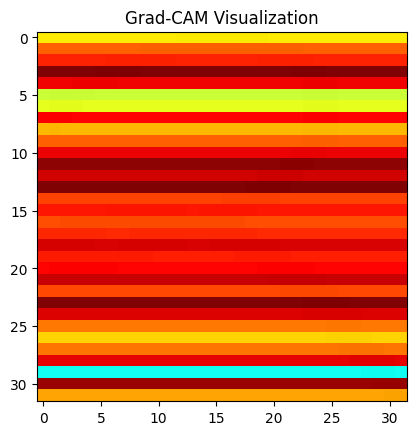

In [16]:
def get_gradcam_heatmap(model, img_array, last_layer_name, pred_index=None):
    """
    Grad-CAM for Vision Transformer (ViT).

    Args:
        model: The trained ViT model.
        img_array: Input image array.
        last_layer_name: Name of the last layer used for feature extraction.
        pred_index: Index of the predicted class.

    Returns:
        heatmap: A Grad-CAM heatmap.
    """
    grad_model = tf.keras.models.Model([model.inputs],
                                       [model.get_layer(last_layer_name).output, model.output])

    # Watch gradients during forward pass
    with tf.GradientTape() as tape:
        last_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])  # Default to the predicted class
        class_channel = preds[:, pred_index]

    # Compute gradients of class output with respect to the feature maps
    grads = tape.gradient(class_channel, last_layer_output)

    # Global average pooling for transformer layers
    pooled_grads = tf.reduce_mean(grads, axis=0)

    # Multiply the gradients with the output feature maps
    last_layer_output = last_layer_output[0]  # Remove batch dimension
    heatmap = tf.reduce_sum(pooled_grads * last_layer_output, axis=-1)

    # Normalize the heatmap between 0 and 1 for visualization
    heatmap = tf.maximum(heatmap, 0)  # ReLU to get only positive gradients
    heatmap = heatmap / tf.reduce_max(heatmap)

    return heatmap.numpy()

# Display the Grad-CAM heatmap
def display_gradcam(image, heatmap, alpha=0.4):
    """
    Superimpose the Grad-CAM heatmap on the original image.

    Args:
        image: Original input image (should be normalized).
        heatmap: The Grad-CAM heatmap (2D array).
        alpha: Transparency factor for heatmap overlay.

    Returns:
        superimposed image.
    """
    # Resize heatmap to the size of the original image
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))

    # Convert heatmap to RGB (apply a colormap)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose heatmap on the original image
    superimposed_img = heatmap * alpha + image
    return np.uint8(255 * superimposed_img / np.max(superimposed_img))

# Example usage
sample_img, _ = next(train_generator)  # Get a batch of images
preds = vit_model.predict(sample_img)

# last_layer_name Used second last dense layer. somehow it works,'
heatmap = get_gradcam_heatmap(vit_model, sample_img, last_layer_name='dense_14')
gradcam_img = display_gradcam(sample_img[0], heatmap)  # Display Grad-CAM for the first image in the batch

plt.imshow(gradcam_img)
plt.title(f"Grad-CAM Visualization")
plt.show()

In [17]:
model.save('model.h5')



In [18]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras model.h5 ./model_js

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 73.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
2024-10-16 17:31:13.632276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 17:31:13.681094: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 17:31:13.693892: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to reg

In [ ]:
!zip -r model_js.zip model_js
from google.colab import files
files.download('model_js.zip')